[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2021/blob/main/01--edi/10--sample-analysis.ipynb)

In [2]:
!wget https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv -O var/otomoto.csv

--2021-11-19 12:31:01--  https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.171.113
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.171.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20920699 (20M) [text/csv]
Saving to: ‘var/otomoto.csv’

var/otomoto.csv     100%[===================>]  19.95M  4.17MB/s    in 6.6s    

2021-11-19 12:31:08 (3.01 MB/s) - ‘var/otomoto.csv’ saved [20920699/20920699]



In [3]:
pip install seaborn matplotlib pandas numpy sns matplotlib

     |████████████████████████████████| 292 kB 2.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 33.2 MB 10.4 MB/s            
Using legacy 'setup.py install' for sns, since package 'wheel' is not installed.
    Running setup.py install for sns ... done
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)


## ładowanie danych

In [22]:
df = pd.read_csv("var/otomoto.csv", sep=";")
df.head(5)

,id,url,Faktura VAT,Marka pojazdu,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,...,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd,Moc
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,NaN,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,...,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła,110 KM
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Tak,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),...,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały),245 KM
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,NaN,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),...,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła,190 KM
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,NaN,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),...,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła,70 KM
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,NaN,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,...,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła,136 KM


In [23]:
df.dtypes

id                                 int64
url                               object
Faktura VAT                       object
Marka pojazdu                     object
Model pojazdu                     object
Kategoria                         object
Pojemność skokowa                 object
Liczba miejsc                    float64
Zarejestrowany w Polsce           object
Wersja                            object
Typ                               object
Rok produkcji                    float64
Serwisowany w ASO                 object
Leasing                           object
VIN                               object
Homologacja ciężarowa             object
VAT marża                         object
Pierwszy właściciel               object
Filtr cząstek stałych             object
Rodzaj paliwa                     object
Emisja CO2                        object
Kraj pochodzenia                  object
Numer rejestracyjny pojazdu       object
Bezwypadkowy                      object
Stan            

In [24]:
df = df.drop(['Skrzynia biegów', 'Moc', 'Faktura VAT'], axis=1)
df.head(5)

,id,url,Marka pojazdu,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,Typ,...,Liczba drzwi,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,Sedan,...,4.0,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),SUV,...,5.0,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały)
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),Sedan,...,5.0,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),Auta miejskie,...,5.0,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,Kabriolet,...,2.0,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła


In [25]:
df = df.rename(columns={"Marka pojazdu": "marka"})

In [26]:
df.head(5)

,id,url,marka,Model pojazdu,Kategoria,Pojemność skokowa,Liczba miejsc,Zarejestrowany w Polsce,Wersja,Typ,...,Liczba drzwi,Metalik,Przebieg,Akryl (niemetalizowany),Możliwość finansowania,Uszkodzony,Oferta od,Kod Silnika,Kolor,Napęd
0,6039269187,https://www.otomoto.pl/oferta/renault-fluence-...,Renault,Fluence,Osobowe,1 600 cm3,5.0,NaN,NaN,Sedan,...,4.0,NaN,172 000 km,Tak,NaN,NaN,Osoby prywatnej,NaN,Biały,Na przednie koła
1,6034090022,https://www.otomoto.pl/oferta/mercedes-benz-kl...,Mercedes-Benz,Klasa G,Osobowe,2 987 cm3,5.0,Tak,W463 (1992-),SUV,...,5.0,Tak,52 904 km,NaN,Tak,NaN,Firmy,G 350,Szary,4x4 (stały)
2,6039268812,https://www.otomoto.pl/oferta/audi-a5-salon-po...,Audi,A5,Osobowe,2 000 cm3,4.0,Tak,8T (2007-2016),Sedan,...,5.0,NaN,56 000 km,NaN,NaN,Tak,Osoby prywatnej,NaN,Czarny,Na przednie koła
3,6039269107,https://www.otomoto.pl/oferta/volkswagen-polo-...,Volkswagen,Polo,Osobowe,1 198 cm3,5.0,NaN,IV (2001-2009),Auta miejskie,...,5.0,Tak,88 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła
4,6038674457,https://www.otomoto.pl/oferta/peugeot-206-cc-w...,Peugeot,206 CC,Osobowe,1 997 cm3,4.0,NaN,NaN,Kabriolet,...,2.0,Tak,176 000 km,NaN,NaN,NaN,Osoby prywatnej,NaN,Srebrny,Na przednie koła


In [27]:
df.shape

(51186, 39)

df.count()   

In [29]:
df = df[['marka', 'price', 'Rok produkcji', 'Przebieg']]

In [30]:
df.head(10)

,marka,price,Rok produkcji,Przebieg
0,Renault,25900.0,2013.0,172 000 km
1,Mercedes-Benz,434900.0,2016.0,52 904 km
2,Audi,41900.0,2011.0,56 000 km
3,Volkswagen,14900.0,2007.0,88 000 km
4,Peugeot,5900.0,2001.0,176 000 km
5,Volkswagen,7900.0,2003.0,300 000 km
6,BMW,9800.0,2002.0,301 000 km
7,Audi,98900.0,2013.0,155 400 km
8,Hyundai,14480.0,2004.0,124 500 km
9,Volkswagen,64900.0,2014.0,95 100 km


## Oczyszczanie

In [39]:
df.isna().sum()

marka            470
price              1
Rok produkcji    470
Przebieg         576
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df.dtypes

marka             object
price            float64
Rok produkcji    float64
Przebieg          object
dtype: object

In [42]:
def clear_millage(millage_as_str):
    
    return int(str(millage_as_str)
               .replace('km', '')
               .replace(' ', '')
           )

assert clear_millage('172 000 km') == 172000

In [43]:
df['Przebieg_as_int'] = df.Przebieg.apply(clear_millage) 

In [44]:
df.count()

marka              50610
price              50610
Rok produkcji      50610
Przebieg           50610
Przebieg_as_int    50610
dtype: int64

In [45]:
df['price'].quantile(q=0.95)

199000.0

In [46]:
df['price'].quantile(q=0.00)

500.0

In [47]:
df.count()
df = df[df['price'] < df['price'].quantile(q=0.95)]

<AxesSubplot:xlabel='price'>

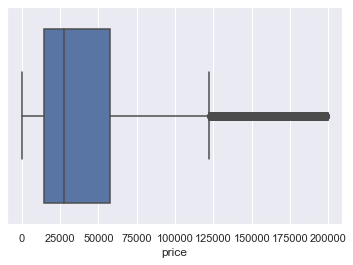

In [48]:
sns.boxplot(x=df['price'])

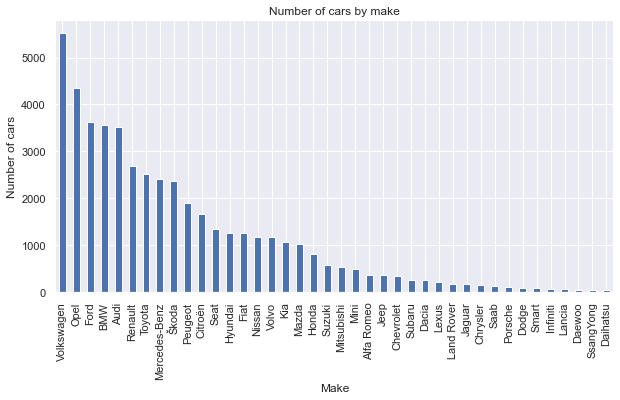

In [49]:
df.marka.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

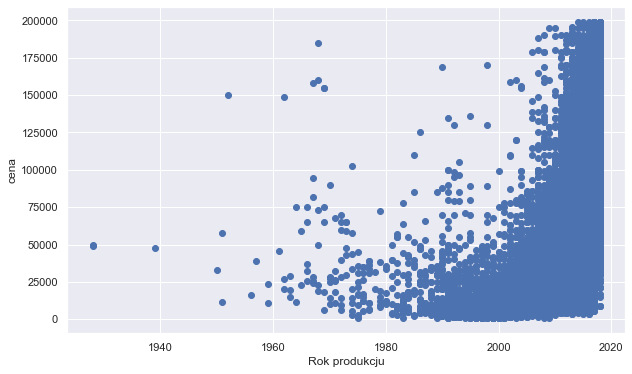

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Rok produkcji'], df['price'])
ax.set_xlabel('Rok produkcju')
ax.set_ylabel('cena')
plt.show()

In [52]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 8.0 MB 2.4 MB/s            
     |████████████████████████████████| 306 kB 11.6 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
df.columns

Index(['marka', 'price', 'Rok produkcji', 'Przebieg', 'Przebieg_as_int'], dtype='object')

In [62]:
df = df.drop(columns=['marka', 'Przebieg'])

In [63]:
df

,price,Rok produkcji,Przebieg_as_int
0,25900.0,2013.0,172000
2,41900.0,2011.0,56000
3,14900.0,2007.0,88000
4,5900.0,2001.0,176000
5,7900.0,2003.0,300000
...,...,...,...
51180,10900.0,2001.0,230000
51181,13555.0,2005.0,160700
51182,136000.0,2013.0,128486
51183,54900.0,2018.0,5


In [64]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.1
)

In [65]:
X_train = train_df[['Rok produkcji', 'Przebieg_as_int']]

In [66]:
y_train = train_df['price']

In [67]:
X_test = test_df[['Rok produkcji', 'Przebieg_as_int']]

In [73]:
y_test = test_df['price']

In [57]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()

In [69]:
model.fit(X_train, y_train)

LinearRegression()

In [70]:
model.score(X_train, y_train)

0.43778357103649956

In [71]:
model.coef_

array([ 3.44810792e+03, -6.68204441e-02])

In [74]:
model.score(X_test, y_test)

0.43732466656882163

In [76]:
X_test.head()

,Rok produkcji,Przebieg_as_int
16770,2004.0,156000
4872,2018.0,7
48293,2004.0,4444
5422,2017.0,4999
29352,1999.0,360000


In [78]:
model.predict(pd.df([(2000, 182000)], columns=['Rok produkcji', 'Przebieg_as_int']))

AttributeError: module 'pandas' has no attribute 'df'